In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [453]:
df = pd.read_csv('Churn_Modelling.csv')

In [454]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [455]:
df.shape

(10000, 14)

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [457]:
df_use = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
df_use

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [458]:
df_use.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [459]:
df_use[['Geography','Gender']].describe()


,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [460]:
df_use.hist?

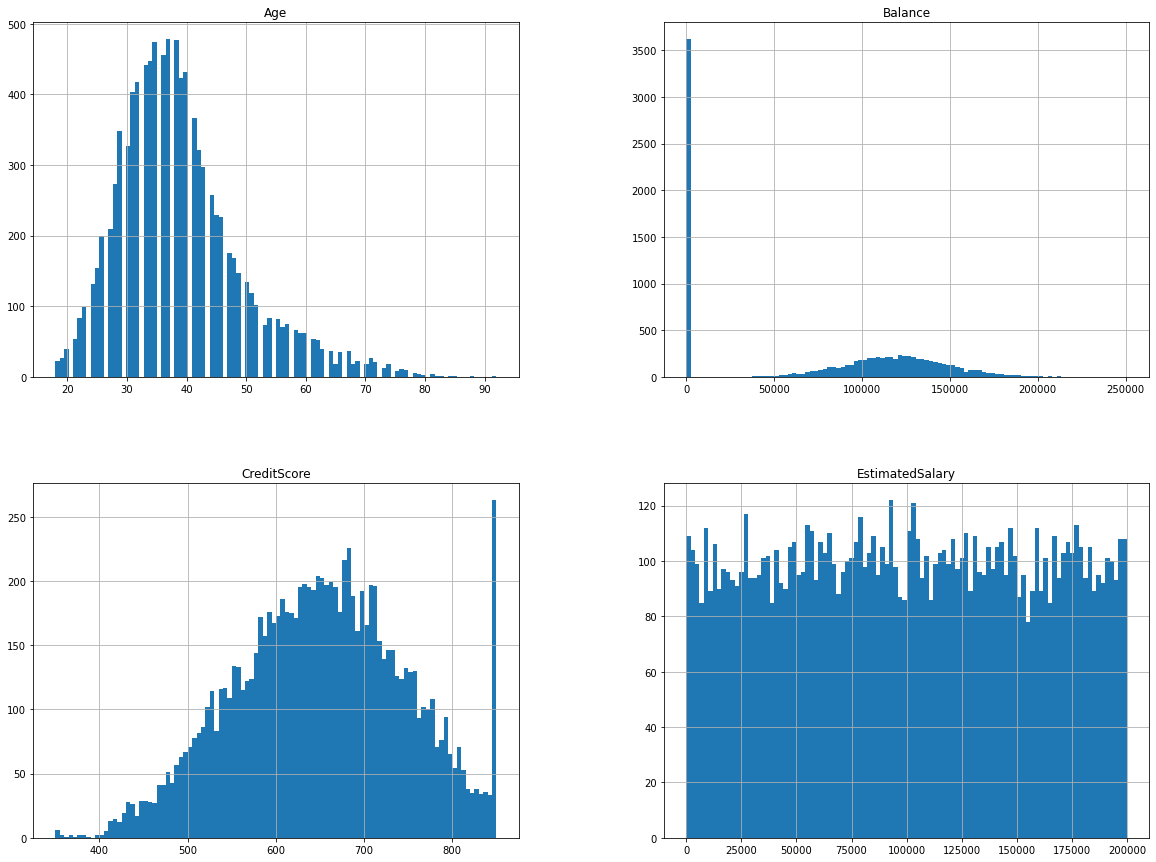

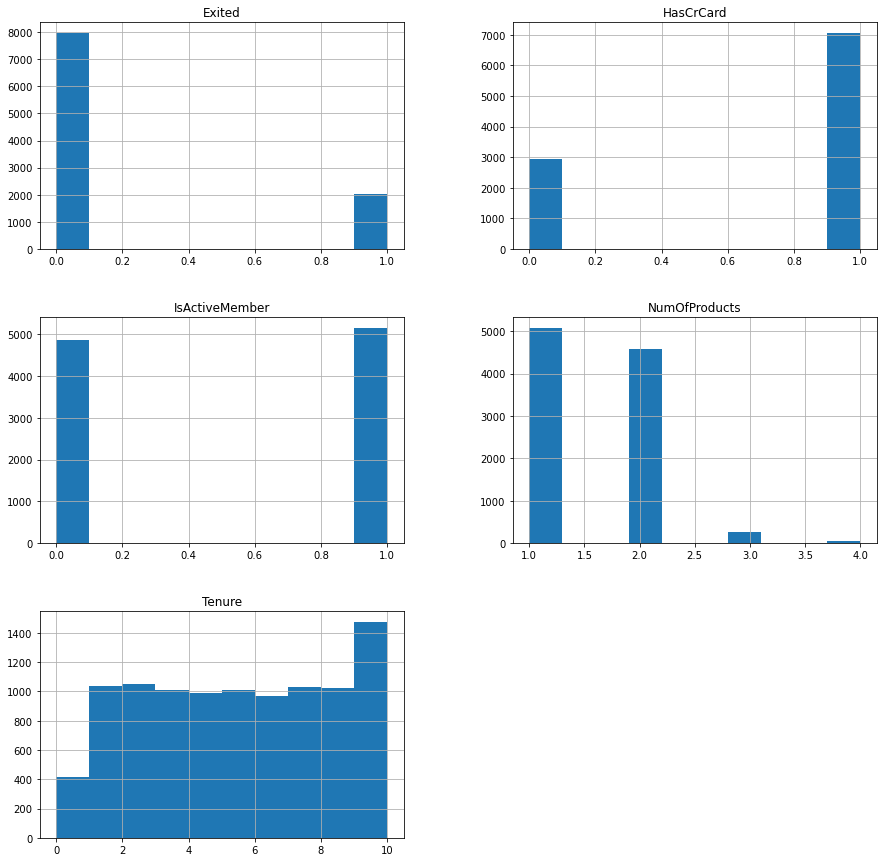

In [461]:
#draw histogram for continuous
df_use.hist(column = ['CreditScore','Age','Balance','EstimatedSalary'],bins=100, figsize=(20, 15))
df_use.hist(column = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited'], figsize = (15,15))
plt.show()

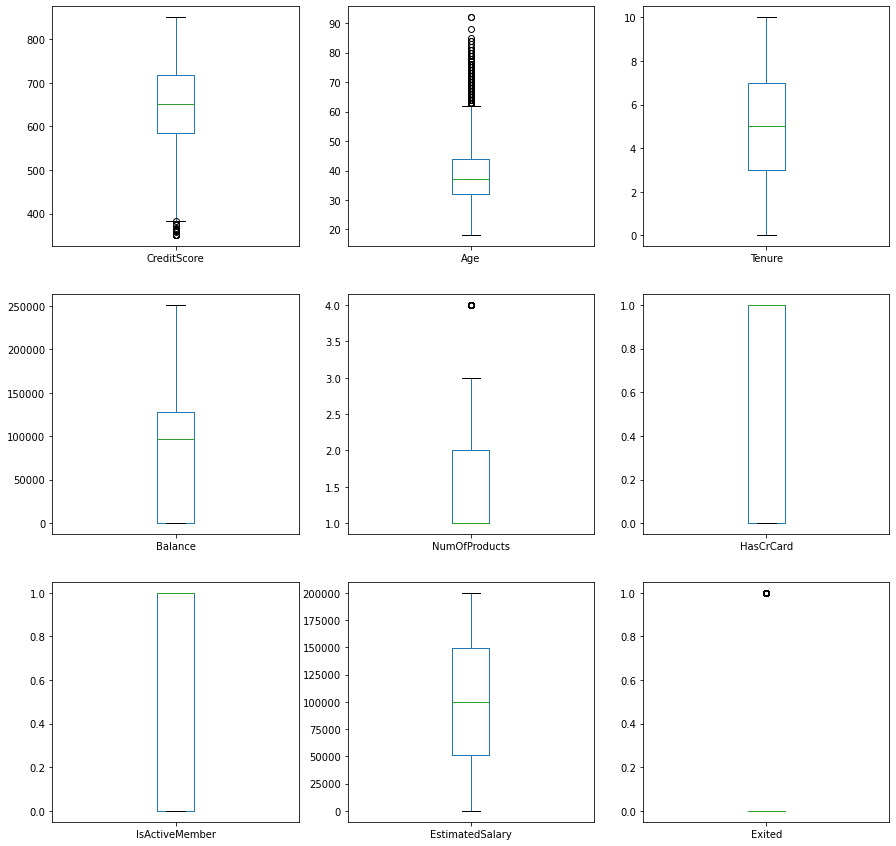

In [462]:
#Boxplot
df_use.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (15,15))
plt.show()

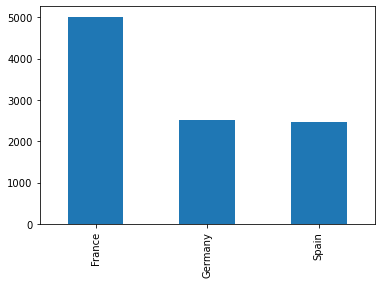

In [463]:
df_use['Geography'].value_counts().sort_index().plot.bar()

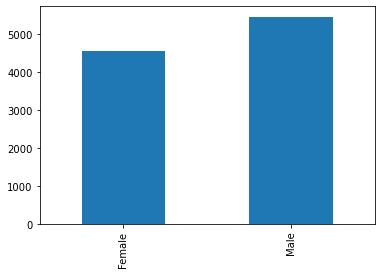

In [464]:
df_use['Gender'].value_counts().sort_index().plot.bar()

In [465]:
#Data Correlation matrix
cor_matrix=df_use.corr().round(decimals=2)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01
Exited,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00


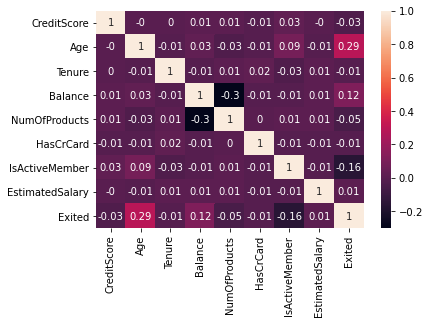

In [466]:
#We can visualize this correlation matrix to see that little relationship in bivariate linear regression
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

In [467]:
#making dummy variables
dummy_variables = pd.get_dummies(df_use['Geography'])
dummy_variables.head(5)
df_reg["Gender"] = np.where(df_reg["Gender"]=='Female',0,1)
df_reg

C:\Users\HI\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [468]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  Int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  Int64  
 3   Tenure           10000 non-null  Int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  Int64  
 6   HasCrCard        10000 non-null  Int64  
 7   IsActiveMember   10000 non-null  Int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  Int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: Int64(7), float64(2), int32(1), uint8(2)
memory usage: 830.2 KB


In [471]:
df_reg

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [429]:
#We drop Geofraphy and Spain as df = 2
df_reg.drop(columns = ['Geography','Spain'], axis = 1, inplace = True)
df_reg

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [474]:
#Import some utilities of sklearn to compare algorithms
from sklearn import model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [475]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7
scoring = 'accuracy'

In [476]:
X = df_reg.drop('Exited', axis='columns')
y = df_reg['Exited']

In [479]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: Int64

In [480]:
# 80% of instances are used to train model and the remaining 20% is hold-out set.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [481]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 4881 to 9412
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7500 non-null   Int64  
 1   Gender           7500 non-null   int32  
 2   Age              7500 non-null   Int64  
 3   Tenure           7500 non-null   Int64  
 4   Balance          7500 non-null   float64
 5   NumOfProducts    7500 non-null   Int64  
 6   HasCrCard        7500 non-null   Int64  
 7   IsActiveMember   7500 non-null   Int64  
 8   EstimatedSalary  7500 non-null   float64
 9   France           7500 non-null   uint8  
 10  Germany          7500 non-null   uint8  
dtypes: Int64(6), float64(2), int32(1), uint8(2)
memory usage: 615.2 KB


In [482]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default


In [436]:
Y_train

4881    0
89      0
845     0
8338    0
9947    1
       ..
919     0
4307    0
5699    0
537     0
9412    0
Name: Exited, Length: 7500, dtype: Int64

In [437]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
4881,579,1,31,6,0.00,2,1,0,26149.25,1,0
89,635,0,28,3,81623.67,2,1,1,156791.36,0,1
845,505,1,49,7,80001.23,1,0,0,135180.11,1,0
8338,602,0,42,1,138912.17,1,1,1,139494.75,0,0
9947,615,1,34,1,83503.11,2,1,1,73124.53,1,0
...,...,...,...,...,...,...,...,...,...,...,...
919,552,1,45,9,0.00,2,1,0,26752.56,0,0
4307,770,1,46,9,190678.02,1,1,1,14725.36,0,0
5699,684,1,35,6,135871.50,1,1,1,87219.41,1,0
537,686,1,34,9,0.00,2,1,0,127569.80,0,0


In [483]:
Logisticmodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model 

ValueError: Unknown label type: 'unknown'